In [ ]:
!pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import inflection
import scipy.stats as stats

from sklearn.model_selection import train_test_split

rcParams['figure.figsize'] = (18, 12)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True

COLORS = ['#99d594', '#D53E4F', '#FC8D59']

SEED = 0

def load_dataset(path):
    df = pd.read_csv(path)
    df.columns = [inflection.underscore(var) for var in list(df.columns)]    
    return df

def data_preparation(df):
    # to be updated
    
    df = df.copy()
    
    # parsing to string
    variables = ['operating_systems', 'browser', 'region', 'traffic_type']
    df[[var]] = df[var].astype(str)
    
    # ordered month

    return df

def split_dataset(df, target='revenue', test_size=0.2, seed=SEED):
    return train_test_split(
        df,
        test_size=test_size,
        random_state=seed,
        stratify=df[target]
    )

# data preparation
df = load_dataset('online_shoppers_intention.csv')
    
# set up the validation framework
full_train, test = split_dataset(df, target='revenue', test_size=0.2)

# grouping the variables based on the type
numerical = [
        'administrative', 'administrative_duration', 'informational',
        'informational_duration', 'product_related', 'product_related_duration',
        'bounce_rates', 'exit_rates', 'page_values', 'special_day', 
]
categorical = [
        'month', 'operating_systems', 'browser', 'region', 'traffic_type',
        'visitor_type', 'weekend', 'revenue'
]

len(numerical), len(categorical)

## Deskripsi kolom

Dataset ini memiliki 18 kolom yang terdiri dari 10 kolom numerik, 7 kolom kategorikal, dan 1 target yang mempunyai tipe kategorikal. Berikut ini deskripsi masing-masing kolom.

* **Administrative**: This is the number of pages of this type (administrative) that the user visited.

* **Administrative_Duration**: This is the amount of time spent in this category of pages.

* **Informational**: This is the number of pages of this type (informational) that the user visited.

* **Informational_Duration**: This is the amount of time spent in this category of pages.

* **ProductRelated**: This is the number of pages of this type (product related) that the user visited.

* **ProductRelated_Duration**: This is the amount of time spent in this category of pages.

* **BounceRates**: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

* **ExitRates**: The percentage of pageviews on the website that end at that specific page.

* **PageValues**: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

* **SpecialDay**: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized

* **Month**: Contains the month the pageview occurred, in string form.

* **OperatingSystems**: An integer value representing the operating system that the user was on when viewing the page.

* **Browser**: An integer value representing the browser that the user was using to view the page.

* **Region**: An integer value representing which region the user is located in.

* **TrafficType**: An integer value representing what type of traffic the user is categorized into.

* **VisitorType**: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

* **Weekend**: A boolean representing whether the session is on a weekend.

* **Revenue**: A boolean representing whether or not the user completed the purchase.

## 1. Descriptive Statistics (20 poin)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12330 non-null  int64  
 1   administrative_duration   12330 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    12330 non-null  float64
 4   product_related           12330 non-null  int64  
 5   product_related_duration  12330 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   special_day               12330 non-null  float64
 10  month                     12330 non-null  object 
 11  operating_systems         12330 non-null  int64  
 12  browser                   12330 non-null  int64  
 13  region                    12330 non-null  int64  
 14  traffi

**Pengamatan**

* Jumlah observasi ada 12330 baris dengan 18 kolom.
* Tidak ada missing values di setiap kolom. Jumlah non-null baris sama dengan jumlah observasi.
* Data type untuk setiap kolom sudah konsisten kecuali `operating_systems`, `browser`, `region`, 
dan `traffic type` yang berupa integer. Keempat kolom tersebut seharusnya memiliki data type string atau object. 

In [ ]:
# descriptive statistics
desc_nums = df[numerical].describe().round(3).T

for i, col in enumerate(numerical):
    desc_nums.loc[col, 'no_unique'] = df[col].nunique()

desc_nums['no_unique'] = desc_nums['no_unique'].astype(int)
desc_nums

,count,mean,std,min,25%,50%,75%,max,no_unique
administrative,12330.0,2.315,3.322,0.0,0.000,1.000,4.000,27.000,27
administrative_duration,12330.0,80.819,176.779,0.0,0.000,7.500,93.256,3398.750,3335
informational,12330.0,0.504,1.270,0.0,0.000,0.000,0.000,24.000,17
informational_duration,12330.0,34.472,140.749,0.0,0.000,0.000,0.000,2549.375,1258
product_related,12330.0,31.731,44.476,0.0,7.000,18.000,38.000,705.000,311
product_related_duration,12330.0,1194.746,1913.669,0.0,184.138,598.937,1464.157,63973.522,9551
bounce_rates,12330.0,0.022,0.048,0.0,0.000,0.003,0.017,0.200,1872
exit_rates,12330.0,0.043,0.049,0.0,0.014,0.025,0.050,0.200,4777
page_values,12330.0,5.889,18.568,0.0,0.000,0.000,0.000,361.764,2704
special_day,12330.0,0.061,0.199,0.0,0.000,0.000,0.000,1.000,6


**Pengamatan**


* Seluruh variabel numerik memiliki nilai mean yang lebih rendah dari nilai mediannya hal ini menunjukkan
variable-variable tersebut memiliki distribusi yang right-skewed.
* Nilai standar deviasi masing-masing variabel memiliki perbedaan nilai yang sangat jauh. Untuk menggunakan
model linear seperti Logistic Regression dan non-linear seperti KNN, variabel-variable tersebut 
harus dinormalisasi terlebih dahulu agar performa model lebih baik.
* Variabel-variabel numerik tersebut didominasi oleh nilai 0. Hal ini masih wajar karena perilaku visitor di setiap sesi beragam dan memungkinkan di setiap sesi ada beberapa metrik pengukuran bernilai 0 karena tidak ada aktivitas dari visitor yang berkaitan dengan metrik tersebut.
* Kolom `special_day` hanya memiliki 6 unique values dan lebih baik di-treat sebagai tipe kategorikal.

In [ ]:
categorical.append('special_day')
desc_cats = df[categorical].astype(str).describe().T
desc_cats['frac_top'] = desc_cats['freq'] * 100 / df.shape[0]
desc_cats

,count,unique,top,freq,frac_top
month,12330,10,May,3364,27.283049
operating_systems,12330,8,2,6601,53.536091
browser,12330,13,2,7961,64.566099
region,12330,9,1,4780,38.767234
traffic_type,12330,20,2,3913,31.735604
visitor_type,12330,3,Returning_Visitor,10551,85.571776
weekend,12330,2,False,9462,76.739659
revenue,12330,2,False,10422,84.525547
special_day,12330,6,0.0,11079,89.854015


**Pengamatan**


* Mayoritas data, dengan persentase di atas 50% data, didominasi oleh 
returning visitor, aktivitas di weekday, kategori 2 browser, kategori 2 operating system, visitor yang tidak menghasilkan revenue, dan bukan special day.
* Kolom `special_day` dan `visitor_type` memiliki salah satu kategori yang terlalu mendominasi di atas 80% yang mana memungkinkan kedua kolom ini tidak perlu dimasukkan ke model karena berpotensi tidak memberi dampak ke performa model.
* Variabel dengan jumlah kategori terbanyak adalah `traffic_type` dengan jumlah 20 kategori unik.
* Bulan dengan jumlah sesi terbanyak adalah bulan mei dengan persentase 27%. 
* Namun, jumlah kategori unik bulan (10) tidak sesuai dengan jumlah bulan di kalender (12), mengindikasikan
ada data pada bulan-bulan tertentu tidak masuk ke dataset ini.
* Sumber traffic terbanyak berasal dari kategori 2 (31%).
* Jumlah sesi terbanyak berasal dari region 1 yang memiliki persentase 38%.
* Jumlah visitor yang tidak menghasilkan revenue sebesar 84% yang berarti di dataset ini memiliki target dengan class imbalance yang tidak terlalu ekstrim.


### Kesimpulan Descriptive Statistics

**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?**

* Hampir seluruh kolom memiliki tipe data yang sesuai kecuali `operating_systems`, `browser`, `region`, 
dan `traffic type` yang seharusnya ber tipe string atau object karena keempat kolom tersebut bertipe kategorikal.

**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**
* Semua kolom tidak memiliki missing values.
    

**C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)**

* Semua kolom memiliki nilai summary yang cukup wajar walaupun seluruh variabel numerik memiliki nilai mean yang berbeda jauh dengan median karena metrik pengukuran memungkinkan didominasi nilai 0 apabila tidak ada aktivitas visitor.

* Kolom special_day hanya memiliki 6 unique values dan lebih baik di-treat sebagai tipe kategorikal.

* Kolom `special_day` dan `visitor_type` memiliki salah satu kategori yang terlalu mendominasi di atas 80% sehingga bisa tidak disertakan pada saat modelling.
 
* Selain itu, class imbalance terdapat di kolom target revenue dengan ratio 85:15.

## 2. Univariate Analysis (30 poin)

### Distribusi variabel numerik

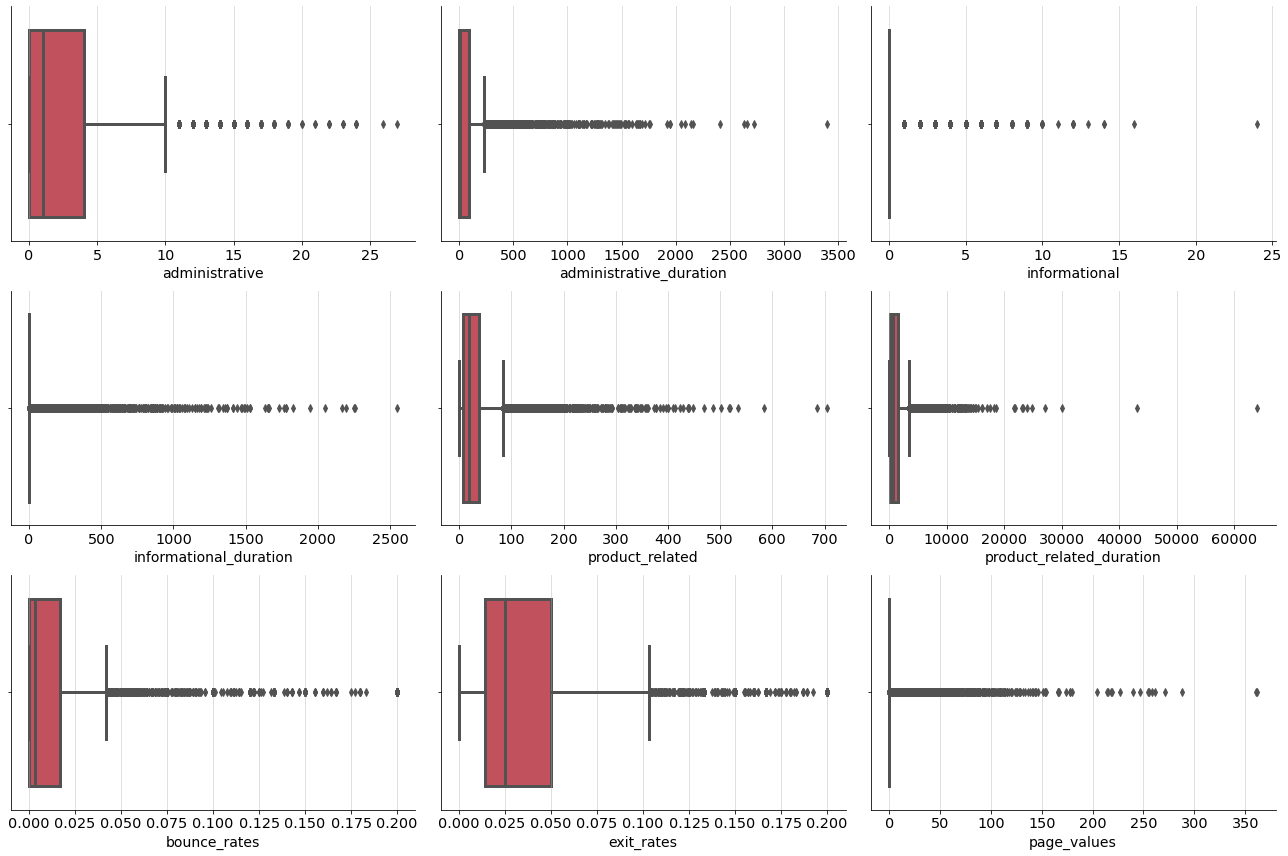

In [ ]:
numerical.remove("special_day")
for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)            
    sns.boxplot(
        x=df[col], 
        color=COLORS[1], 
        orient='h'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show() 

**Pengamatan**
* Seluruh kolom terlihat memiliki outlier yang cukup banyak dan nilai median masing-masing kolom bernilai 0 atau mendekati 0.
* Pada kolom `informational`, `informational_duration`, dan `page_values` masing-masing quantile terlalu berdekatan. Hal ini sesuai dengan descriptive statistics di atas yang menunjukkan sampai dengan 75% data masih bernilai 0.

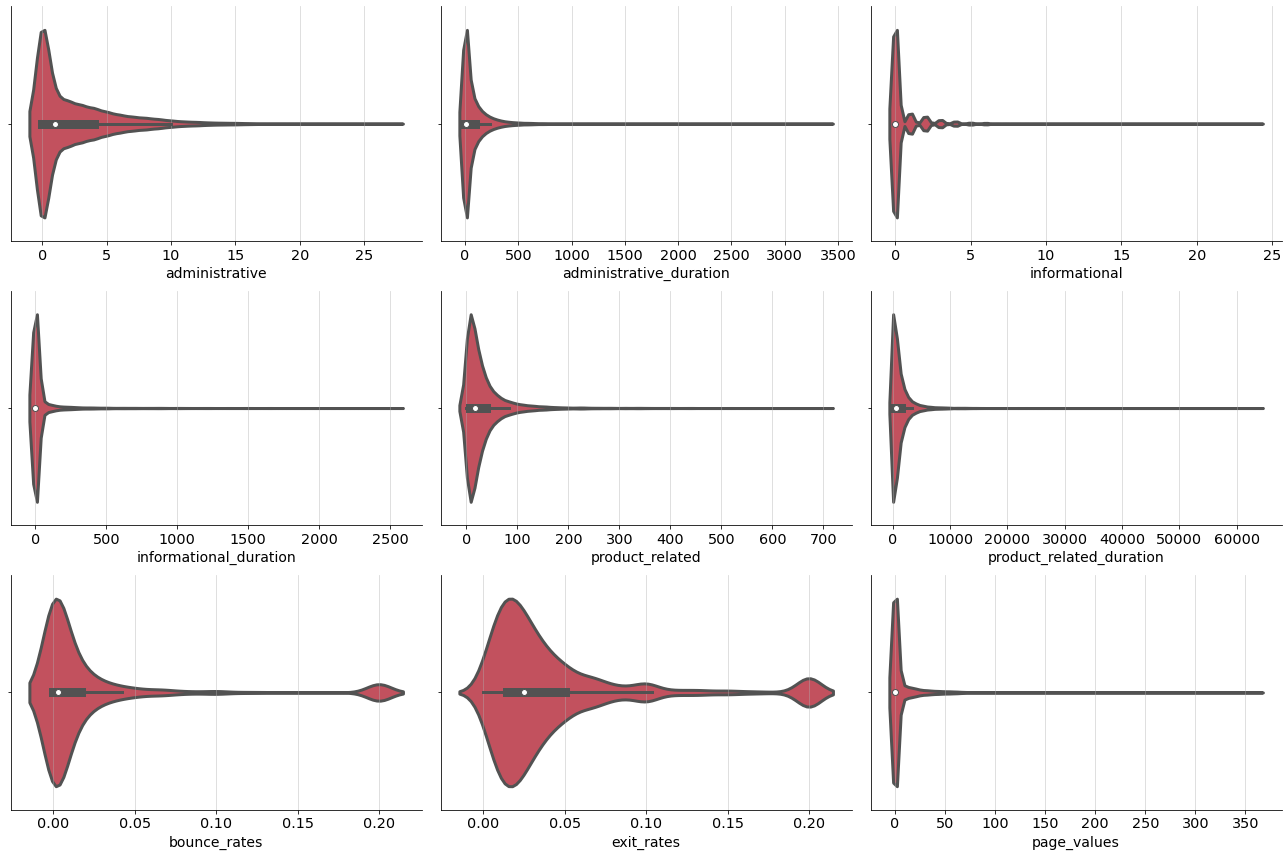

In [ ]:
for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)            
    sns.violinplot(
        x=df[col], 
        color=COLORS[1], 
    )
    plt.xlabel(col, fontsize=14) 
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show()            

**Pengamatan**

* Berdasarkan plot di atas, seluruh kolom numerik memiliki distribusi yang right-skewed yang mana mayoritas data bernilai 0 dan berada dekat nilai 0.
* Tidak ada kolom numerik yang memiliki distribusi mendekati normal. Namun, `bounce_rates` dan `exit_rates` memiliki distribusi mendekati log-normal.

### Distribusi variabel kategorikal

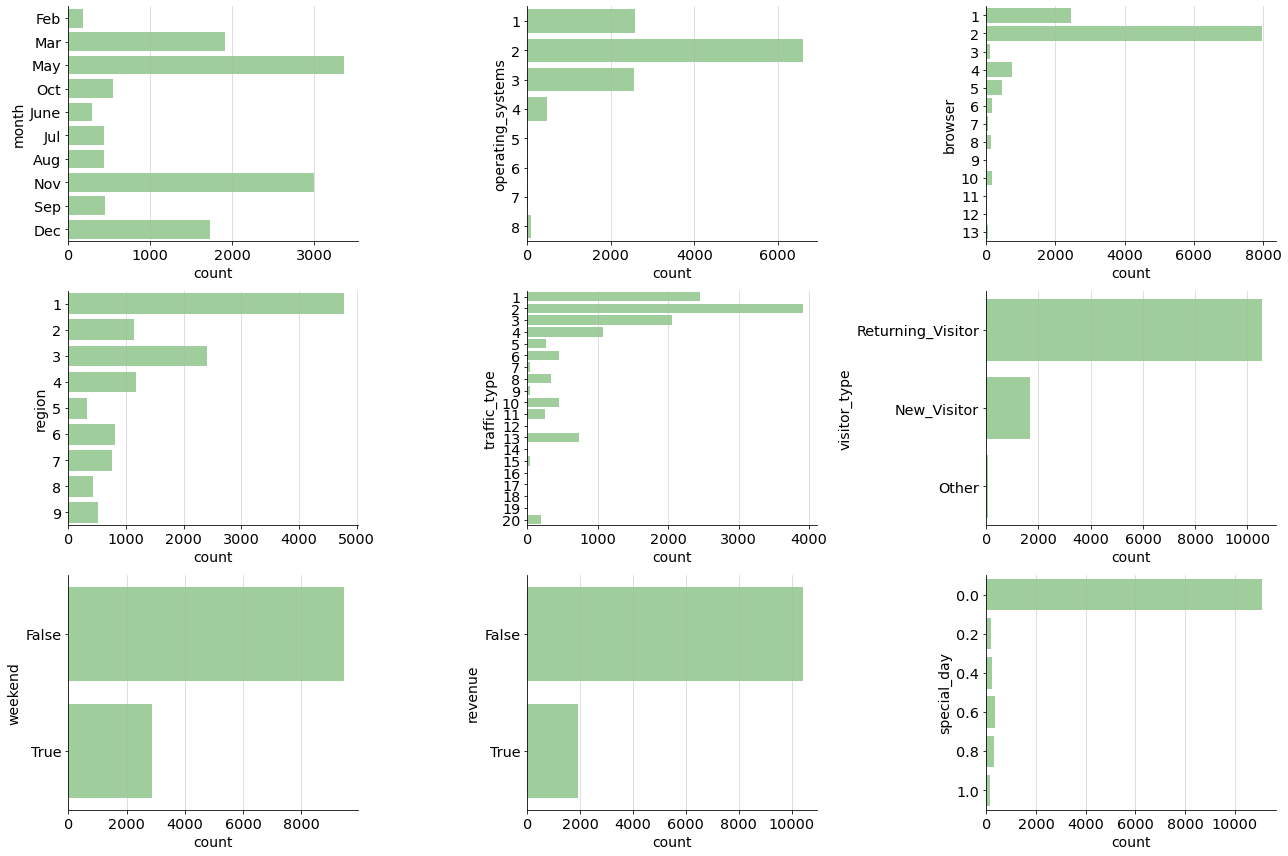

In [ ]:
for i, col in enumerate(categorical):
    plt.subplot(3, 3, i+1)
    sns.countplot(
        y=df[col], 
        color=COLORS[0], 
        orient='v'
    )
    plt.xlabel("count", fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()

plt.show()

**Pengamatan** 
* Pada kolom bulan, tidak terdapat data pada bulan `januari` dan `april`.
* Kolom `operating_system` dan `traffic_type` hanya didominasi oleh kategori 1, 2, dan 3, sedangkan kolom `browser` hanya kategori 1 dan 2.
* Kolom dengan jumlah unique value terbanyak adalah `traffic type` dan `browser`.
* Untuk kolom `visitor_type` ada jenis visitor yang tidak diketahui ditandai oleh `Other`.
* Berdasarkan target yaitu kolom revenue, terdapat hampir 2,000 pengunjung website menghasilkan revenue (15%) sedangkan lebih dari 10,000 pengunjung website tidak (85%).

### Rekomendasi preprocessing berdasarkan Univariate Analysis


**1. Kolom numerik**
* Semua kolom numerik memiliki distribusi right-skewed sehingga butuh ditranformasi agar mendekati distribusi normal. 
* Beberapa **metode transformasi** yang bisa digunakan sebagai berikut:
    * log-transformer (`np.log1p`). Alasan memilih `np.log1p` dibandingkan `np.log` karena kolom numerik didominasi nilai 0. Sehingga, apabila menggunakan `np.log` maka hasil transformasi akan bernilai infinity.
    * yeo-johnson method
* Seluruh kolom numerik tidak berada di rentang yang sama sehingga harus diskala ulang atau dinormalisasi.
* Beberapa metode **normalisasi atau scaling** dari `scikit-learn` yang bisa digunakan yaitu
    * `MinMaxScaler`
    * `StandardScaler`
    * `RobustScaler`
* Outlier handling tidak diterapkan karena secara natural distribusi semua kolom numerik memang skewed.

**2. Kolom kategorikal**
* **month**: sin-cos transformation. Dengan transformer ini, hubungan siklus dapat diketahui oleh algoritma machine learning.
* **operating_systems**: ada beberapa opsi data preprocessing yaitu
    * rare label dan one-hot encoder. Kategori 1, 2, dan 3 akan tetap dipertahankan dan selain ketiga kategori itu akan dijadikan satu kategori yaitu `other`. Kemudian keempat kategori tersebut di one-hot encoded.
    * target encoder atau mean encoder. Seluruh unique value dari kolom ini diubah menjadi fraksi jumlah revenue per jumlah seluruh sesi.
* **browser**, **region**, **traffic_type**:
    * rare label dan one-hot encoder
    * target encoder atau mean encoder
* **visitor_type**, **weekend**: karena unique value hanya 2-3 saja, maka one-hot encoder bisa diterapkan.
* **revenue**: karena terdapat class imbalance dengan ratio 85:15 (majority class: minority class) maka ada beberapa cara preprocessing yang dapat digunakan sebagai berikut
    * resampling (oversampling, undersampling, atau over-under sampling)
    * memberi class weight yang lebih tinggi ke minority class
    
Referensi
* [Transformation & Scaling Numeric Features Intuition](https://towardsdatascience.com/transformation-scaling-of-numeric-features-intuition-7f4436e8e074#:~:text=If%20dependent%20features%20are%20transformed,should%20be%20applied%20after%20transformation)

## 3. Multivariate Analysis (20 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?

* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

### Feature numerik vs label revenue

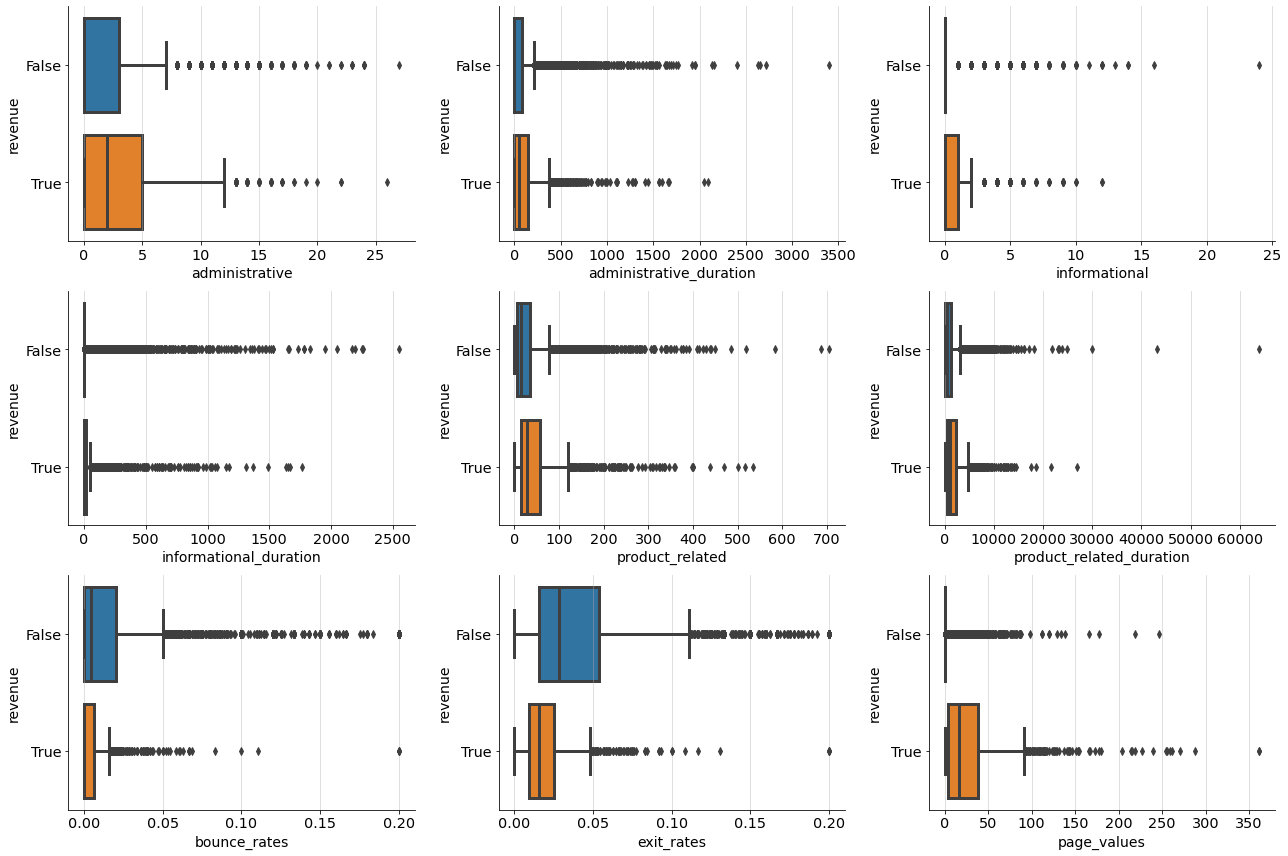

In [ ]:
for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.boxplot(
        y=df['revenue'], 
        x=df[col], 
        orient='h'
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('revenue', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show()

**Pengamatan**
* Pengunjung website mengunjungi halaman web product related lebih banyak dibandingkan dengan halaman administratif dan information.
* Pengunjung yang menghasilkan revenue cenderung lebih lama mengakses halaman web product related.
* Pengunjung dengan bounce rates yang lebih rendah, exit rates yang lebih rendah, dan page values yang lebih tinggi cenderung menghasilkan revenue.


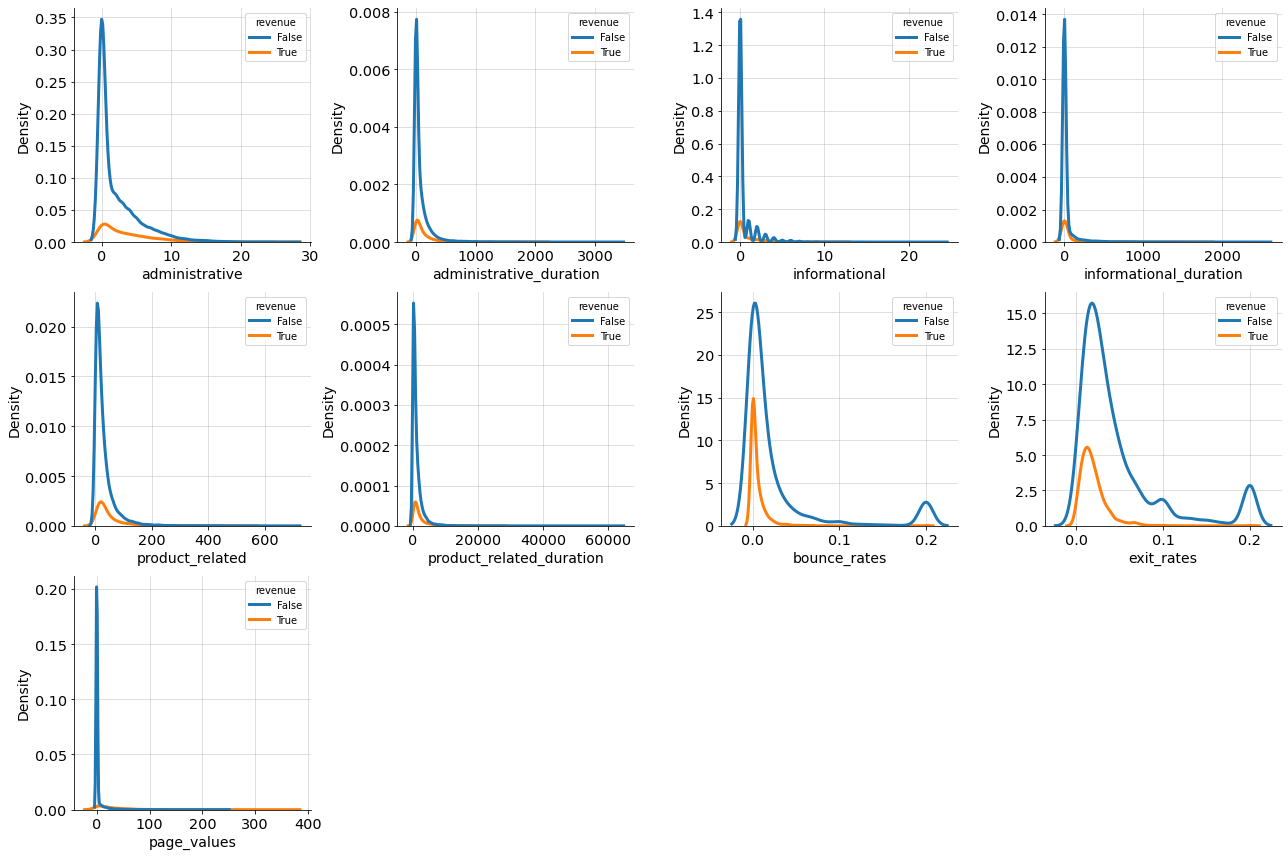

In [ ]:
for i, col in enumerate(numerical):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(
        x=df[col],
        hue=df['revenue'],
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()

plt.show()

**Pengamatan**
* Pada kolom exit_rates terlihat untuk jumlah sesi yang menghasilkan revenue, nilai exit_rates cenderung rendah dengan data terbanyak tersebar di rentang 0 - 0.05. 
* Sedangkan pada bounce_rates, jumlah sesi yang menghasilkan revenue cukup signifikan di rentang 0.00 - 0.01.
* Pada kolom page_values, di rentang 0 - 100, jumlah sesi yang menghasil revenue cukup tinggi.

### Feature kategorikal vs label revenue

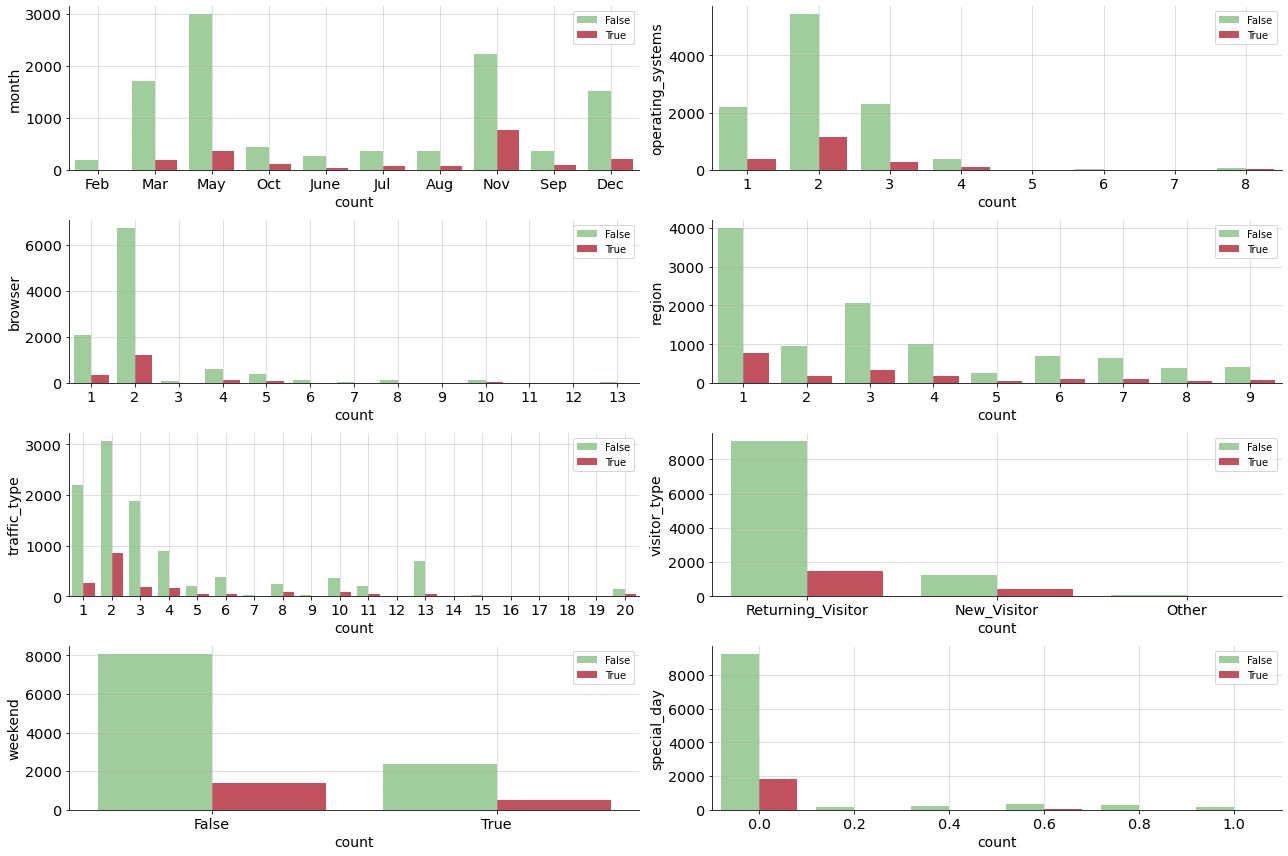

In [ ]:
categorical.remove('revenue')
for i, col in enumerate(categorical):
    plt.subplot(4, 2, i+1)
    sns.countplot(
        x=df[col], 
        palette=COLORS, 
        orient='h',
        hue=df['revenue']
    )
    plt.xlabel("count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)
    plt.legend(loc='upper right')
    plt.tight_layout()

plt.show()

**Pengamatan**
* Jumlah pengunjung website yang menghasilkan revenue terbanyak pada bulan November dan terendah pada bulan Februari dan Juni. 
* Pengunjung website yang menghasilkan revenue mayoritas menggunakan browser dan OS tipe 2.
* Sumber traffic yang paling banyak menghasilkan revenue adalah traffic type 2.
* Returning visitor banyak yang tidak melakukan transaksi yang menghasilkan revenue.
* Pengunjung website lebih banyak bertransaksi di weekday daripada di weekend.

### Analisis Korelasi

Analisis korelasi memiliki tujuan untuk mengetahui korelasi antar feature serta korelasi antara feature terhadap label. Berikut ini cara untuk menemukan korelasi setiap pasangan tipe variabel yang akan diuji:
1. **Feature Numerik - Feature Numerik**: `spearman's correlation`
2. **Feature Numerik - Label Kategorikal**: `mann-whitney u test`
3. **Feature Kategorikal - Label Kategorikal**: `chi-square test`

Referensi
* [Exploratory Data Analysis for Feature Selection, Google Cloud](https://drive.google.com/file/d/1Xt7kTxT0kQwALgvvstZ-N4MKH9dFOS9I/view?usp=sharing)
* [Spearman's rho](https://www.statstest.com/spearmans-rho/#Monotonicity)
* [Mann-whitney U test](https://www.statstest.com/mann-whitney-u-test/)
* [Chi-square test](https://www.statstest.com/chi-square-test-of-independence/)

#### 1. Korelasi antar feature numerik

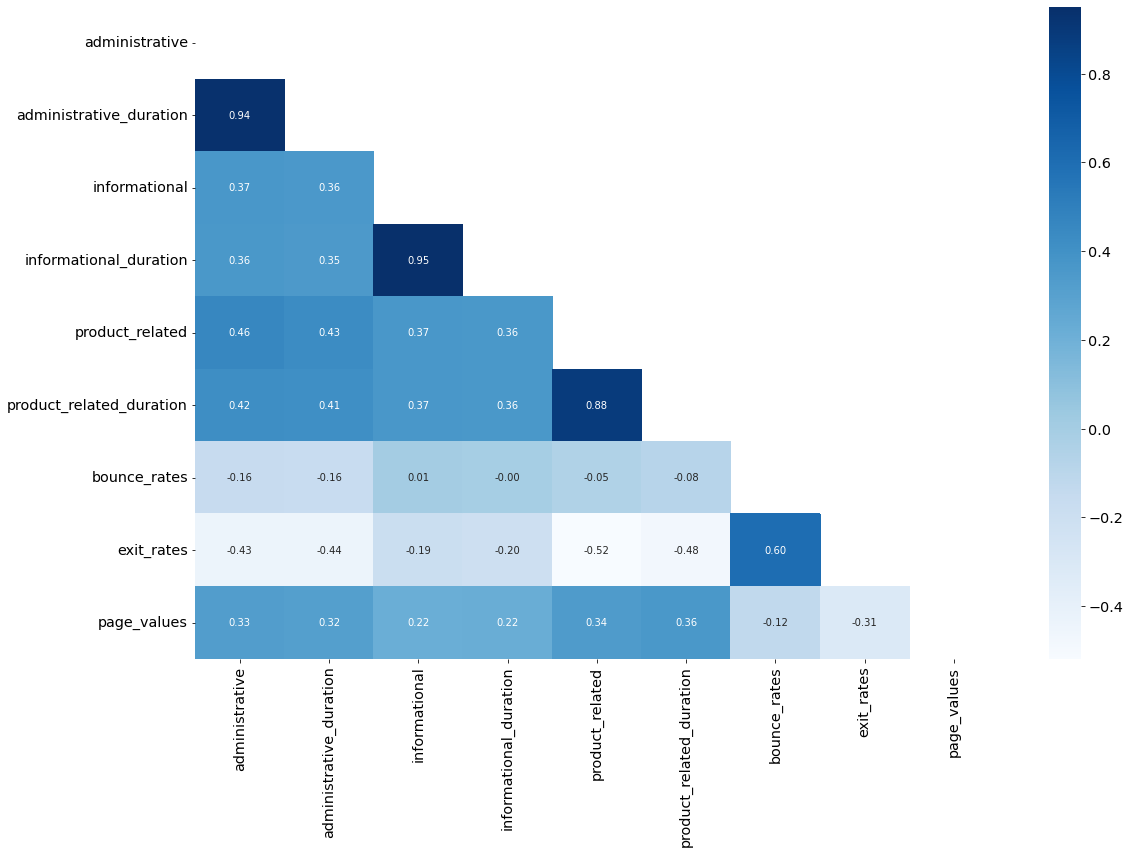

In [ ]:
data = df[numerical].corr(method='spearman')
sns.heatmap(
    data, 
    mask=np.triu(np.ones_like(data)),
    cmap='Blues', annot=True, fmt='.2f'
)
plt.show()

  **Pengamatan**
  * Kolom jumlah page dan jumlah durasi page memiliki korelasi yang tinggi yaitu 0.88 - 0.95.
  * Kolom-kolom numerik yang berkorelasi  sangat tinggi harus ditinggalkan salah satunya. 
  * Selain keempat kolom tersebut, korelasi antar feature numerik dibawah 0.8.

#### 2. Korelasi antara feature numerik dan label

Sebagai catatan, karena label (target variabel) bertipe kategori, maka korelasi pearson antara feature numerik dan label tidak dapat merepresentasikan korelasi yang sebenarnya. Cara yang tepat untuk menemukan korelasi antara kolom numerik yang memiliki distribusi skewed terhadap kolom kategori adalah dengan menggunakan **Mann-Whitney U test**. Kemudian, p-value dari hasil test digunakan untuk menentukan korelasi antar variabel.

Berikut ini null hypothesis dan alternative hypothesis yang digunakan t-test. Nilai signifikan (alpha) yang ditetapkan adalah 0.05:
* Null hypothesis **(H0)**: feature dan label **independen**
* Alternative hypothesis **(H1)**: feature dan label **tidak independen**

Hasil U test sebagai berikut.

In [ ]:
def mann_whitney_utest(df, numerical, target='revenue'):
    df = df.copy()
    numerical.append("special_day")

    # initialize dataframe for storing test results
    num_features = pd.DataFrame(np.empty((10, 3)))
    num_features.columns = ['categorical', 'group_1', 'group_2']
    num_features['categorical'] = target
    num_features['group_1'] = 'False'
    num_features['group_2'] = 'True'
    num_features['numerical'] = numerical

    # group by revenue class (True and False)
    group_1 = df.groupby('revenue').get_group(False).reset_index(drop=True)
    group_2 = df.groupby('revenue').get_group(True).reset_index(drop=True)

    # two sampled t-test
    results = []
    for num in numerical:
        a = group_1[num]
        b = group_2[num]
        
        results.append(stats.mannwhitneyu(a, b))
    
    # t-test results
    results = pd.DataFrame(results)
    results.columns = ['statistic', 'p_value']

    return pd.concat([num_features, results], axis=1)

mann_whitney_utest(df, numerical).sort_values(by='p_value')

,categorical,group_1,group_2,numerical,statistic,p_value
8,revenue,False,True,page_values,2718419.0,0.000000e+00
7,revenue,False,True,exit_rates,5903869.0,5.784121e-176
5,revenue,False,True,product_related_duration,6502463.0,2.666134e-128
4,revenue,False,True,product_related,6792127.0,5.262193e-108
0,revenue,False,True,administrative,7421135.5,6.559659e-78
1,revenue,False,True,administrative_duration,7487115.0,2.336130e-74
6,revenue,False,True,bounce_rates,7686683.0,9.163850e-62
2,revenue,False,True,informational,8648742.0,6.013907e-37
3,revenue,False,True,informational_duration,8711649.0,7.045193e-36
9,revenue,False,True,special_day,9220133.0,2.539780e-22


**Pengamatan**
* Dari hasil U-test di atas, seluruh kolom memiliki p_value yang lebih kecil dari alpha (**p_value < alpha**) sehingga semua kolom numerik memiliki korelasi terhadap label revenue.
* `page_values`, `exit_rates`, `product_related_duration`, dan `product_related` memiliki korelasi paling tinggi di antara seluruh kolom numerik.

#### 3. Korelasi antara feature kategorikal dan label

Berikut ini hypothesis yang digunakan chi-square test dengan nilai signifikan (alpha) yang ditetapkan 0.05.
* Null hypothesis **(H0)**: feature dan label **independen**
* Alternative hypothesis **(H1)**: feature dan label **tidak independen**

Hasil chi-square test sebagai berikut.

In [ ]:
def chi_square_test(df, cat1='operating_systems', cat2='revenue'):
    # create a contigency table for input of chi-square test
    table = pd.crosstab(df[cat1], df[cat2])

    # perform the chi-square test
    chi_stats, p_value, dof, exp_val = stats.chi2_contingency(table) 

    return chi_stats, p_value, dof, exp_val

def test_results(df, categorical, target='revenue'):
    # remove revenue from categorical list
    cat_features = categorical.copy()
    
    if target in categorical:
        cat_features.remove(target)
        cat_features.remove("special_day")
    
    # chi-square test
    test = []
    for feature in cat_features:
        test.append((chi_square_test(df, cat1=feature, cat2=target)))
    
    # store the test results to dataframe
    cat_df = pd.DataFrame()
    cat_df['cat1'] = cat_features
    cat_df['cat2'] = target
    
    results = pd.DataFrame(test).drop(3, axis=1)
    results.columns = ['chi_stats', 'p_value', 'dof']

    results['association'] = np.nan
    for i, p_val in enumerate(results['p_value']):
        if p_val < 0.05:
           results.loc[i, 'association'] = 'dependent'
        else:
           results.loc[i, 'association']  = 'independent'
           
    return pd.concat([cat_df, results], axis=1)

test_results(df, categorical).sort_values(by='p_value')

,cat1,cat2,chi_stats,p_value,dof,association
0,month,revenue,384.934762,2.238786e-77,9,dependent
4,traffic_type,revenue,373.145565,1.652735e-67,19,dependent
5,visitor_type,revenue,135.251923,4.269904e-30,2,dependent
7,special_day,revenue,96.076906,3.543244e-19,5,dependent
1,operating_systems,revenue,75.027056,1.416094e-13,7,dependent
6,weekend,revenue,10.390978,1.266325e-03,1,dependent
2,browser,revenue,27.715299,6.087543e-03,12,dependent
3,region,revenue,9.252751,3.214250e-01,8,independent


**Pengamatan**
* Berdasarkan hasil chi-square test, `region` tidak memiliki korelasi terhadap `revenue` sehingga bisa di-drop saat modelling karena hanya `region` yang memiliki p-value diatas alpha 0.05.
* Apabila melihat p-value maka kolom kategorikal yang memiliki korelasi paling tinggi adalah `month`, `traffic_type`, dan `visitor_type`

### Kesimpulan multivariate analysis

**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?**
* Berdasarkan analisis korelasi semua kolom numerik dan kategorikal memiliki korelasi ke target kecuali feature `region`. Berikut ini adalah 3 feature dari masing-masing tipe kolom yang paling tinggi nilai korelasi terhadap target.
    * Numerik: `page_values`, `exit_rates`, dan `product_related_duration`
    * Kategorikal: `month`, `traffic_type`, dan `visitor_type`

**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?**

* Berdasarkan spearman's correlation yang ditunjukkan oleh heatmap, ada korelasi antar feature numerik yang significant di atas 0.8 yaitu kolom jumlah page dan jumlah durasi page memiliki korelasi yang tinggi yaitu 0.88 - 0.95.

* Karena terdapat korelasi tinggi antar feature numerik dan ada feature kategorikal yang tidak berkorelasi ke label maka 
  * Salah satu dari pasangan kolom numerik yang berkorelasi tinggi harus didrop
  * Kolom region bisa didrop


## 4. Business Insight (30 poin)

Dari data yang tersedia, secara teori sebenarnya hampir semua variabel bisa memiliki pengaruh terhadap jumlah pengunjung website yang menghasilkan revenue. Sayangnya, beberapa variabel bertipe integer tidak ada ada tabel acuannya (contoh: traffic type, etc) sehingga tidak bisa semuanya dijadikan insight yang mendetail.


### Insight from Bounce Rates

Bounce rate yang tinggi pada halaman ecommerce, secara umum akan menghasilkan revenue yang sedikit. Untuk ecommerce, bounce rate dibawah 20% atau diatas 90% dapat menjadi tanda bahwa ada hal yang tidak beres. Ketika bounce rate terlalu rendah, bisa saja disebabkan masalah pada analytics setup. Sementara bounce rate yang terlalu tinggi, bisa jadi pertanda bahwa site ecommerce tidak memiliki performance yg baik [(reference)](https://www.softformance.com/blog/bounce-rate/#:~:text=For%20the%20most%20part%2C%20bounce,offering%20a%20poor%20user%20experience.).

Pengunjung yang menghasilkan revenue cenderung memiliki bounce rate yang lebih rendah dibandingkan yang tidak menghasilkan revenue yang mana sesuai dengan reference dan teori secara umum. Namun, apabila dilihat secara keseluruhan, rata-rata dan median bounce rate rendah: 0.3-2.3% dan nilai max 20% sedangkan persentase jumlah pengunjung yang menghasilkan revenue sangat kecil sekitar 15% dari seluruh total pengunjung.

**Rekomendasi**: Lakukan pengecekan terhadap analytics setup, apakah ada kesalahan setting sehingga ada bounce rate yang tidak terdeteksi.

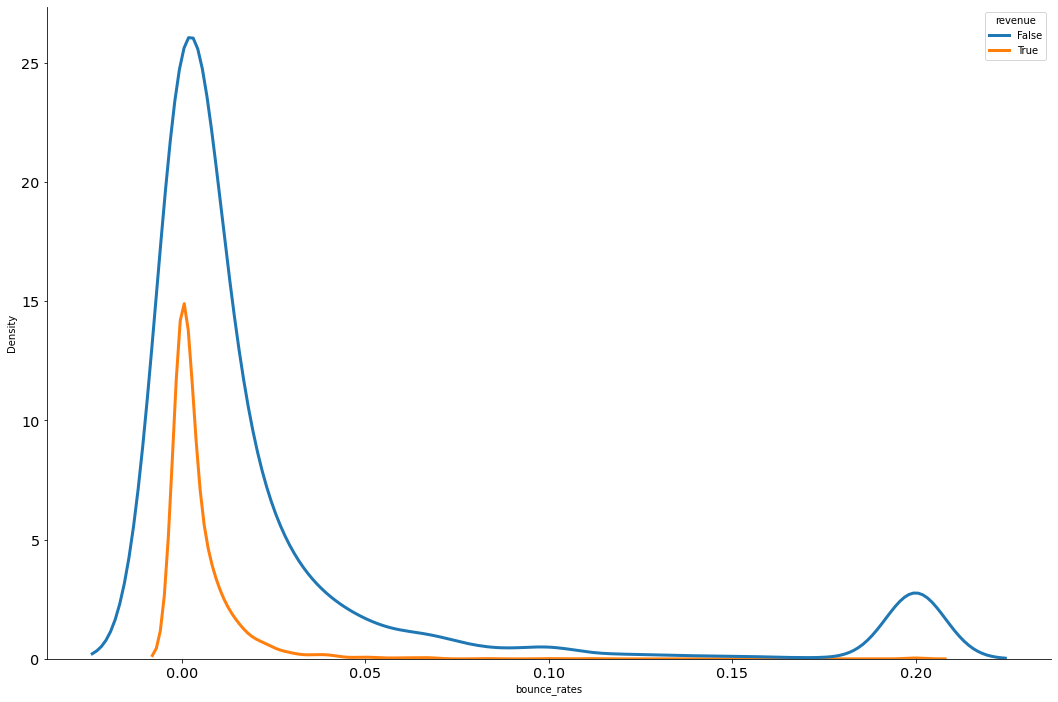

In [ ]:
sns.kdeplot(x='bounce_rates', hue='revenue', data=df);

### Insight from Exit Rates

Exit Rates adalah persentase ketika visitor keluar dari website kita dari page/halaman tertentu (halaman terakhir sebelum visitor meninggalkan website kita). Exit rate yang tinggi pada sebuah halaman spesifik dapat menjadi pertanda ada yg salah dengan halaman tersebut terutama high exit rate pada halaman check-out atau halaman produk. Tetapi, ada pengecualian pada halaman-halaman tertentu, Sebagai contoh pada Thank you Page, setelah transaksi, exit rate tinggi bisa jadi termasuk hal yang normal [(reference)](https://www.americaneagle.com/insights/blog/post/2021/05/11/conversion-rate-optimization-understanding-your-exit-rate).

Exit rate secara langsung terkait dengan bounce rate, karena parameter bagi keduanya adalah ketika visitor meninggalkan website [(reference)](https://support.google.com/analytics/answer/2525491?hl=en#:~:text=For%20all%20pageviews%20to%20the,that%20start%20with%20that%20page.). Benchmark hampir sama dengan bounce rate yang mana dibawah 20% terlalu rendah dan diatas 90% terlalu tinggi.

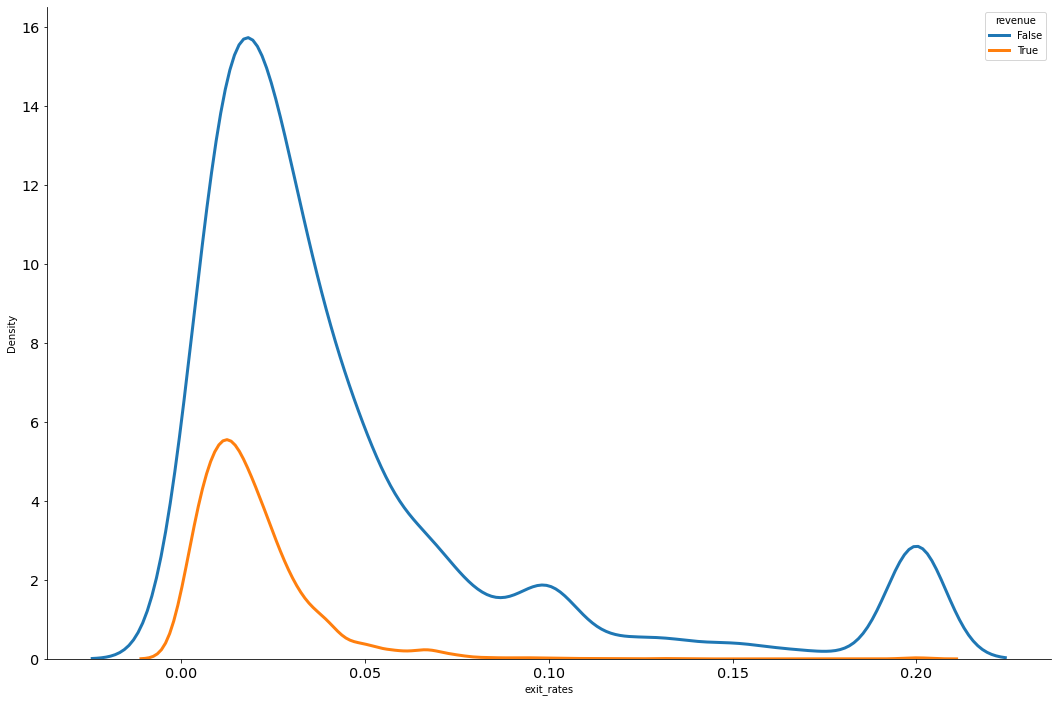

In [ ]:
sns.kdeplot(x='exit_rates', hue='revenue', data=df);

Jumlah pengunjung yang menghasilkan revenue cenderung memiliki exit rate yang lebih rendah dibandingkan yang tidak menghasilkan revenue yang mana sesuai dengan reference dan teori secara umum. Rata-rata dan median exit rate rendah: 2.5-4% , max values nya juga 20%. 

**Rekomendasi**: lakukan pengecekan apakah analytics setup sudah benar.

### Insight from Product Related

Secara general, visitor yang mengunjungi pages bertipe product related memiliki intensi membeli yang lebih tinggi atau sedang dalam tahap membuat decision untuk membeli. Product page yang menghasilkan hanya sedikit revenue dapat mengindikasikan bahwa product page tersebut tidak mendemonstrasikan produk dengan baik atau secara interface juga tidak cukup membuat user betah dipage tersebut [(reference)](https://optinmonster.com/reasons-your-ecommerce-site-has-a-low-conversion-rate/).

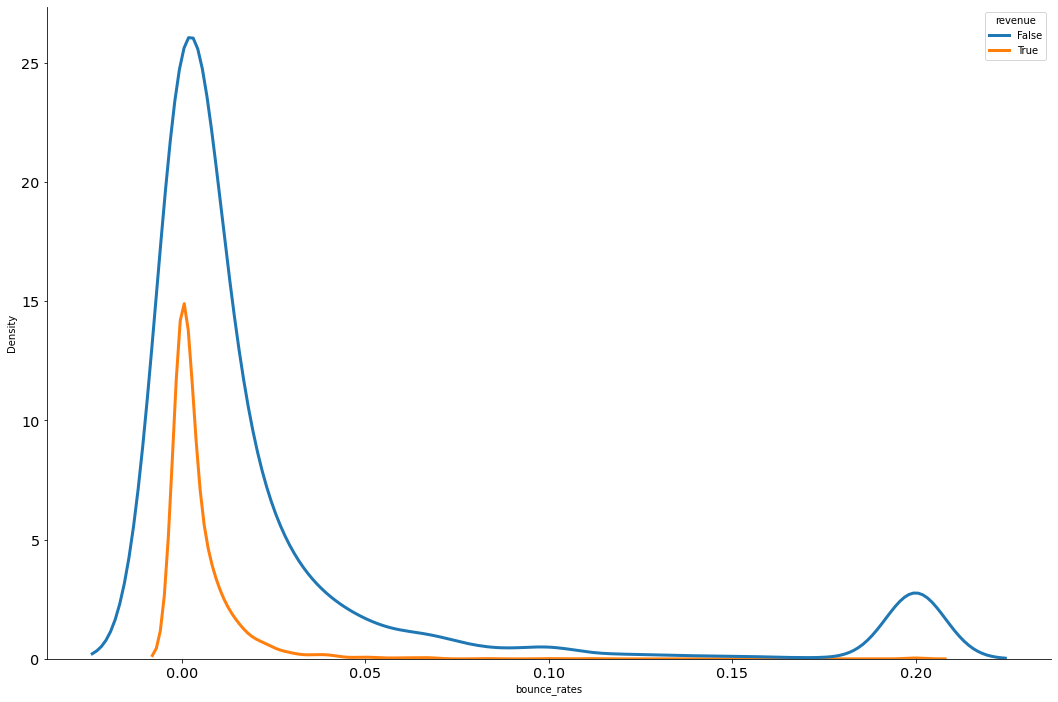

In [ ]:
sns.kdeplot(x='bounce_rates', hue='revenue', data=df);

Diantara semua jenis page (product page, administrative, informational), product page adalah yang jumlahnya paling banyak dan paling lama dikunjungi oleh visitor. (90% dari total kunjungan dan durasi kunjungan semua page).

Bila dilihat pun dari seluruh transaksi dengan revenue, sebagian besar adalah berasal dari visit ke product page.
Tetapi 90% total kunjungan page dibandingkan dengan 15% sesi yang menghasilkan conversion, terbilang rendah.

**Rekomendasi**: Lakukan pengecekan terhadap product related page dari segi interface, kemudahan akses, kejelasan informasi dan demonstrasi produk, dll. Apakah high product page visit tapi low conversion disebabkan oleh hal-hal tersebut.

### Insight from Page Values

Nilai page value yang tinggi menunjukkan page mana yang lebih attractive dimata visitor, dengan mengetahui page yang memiliki high value tinggi, kita bisa memusatkan page tersebut untuk generate lebih banyak revenue (reference). Sesi yang menghasilkan pendapatan cenderung memiliki page value yang lebih tinggi dibandingkan yang tidak menghasilkan revenue yang mana sesuai dengan reference dan teori secara umum [(reference)](https://betterstudio.com/blog/page-value-in-google-analytics/#what-is-page-value).

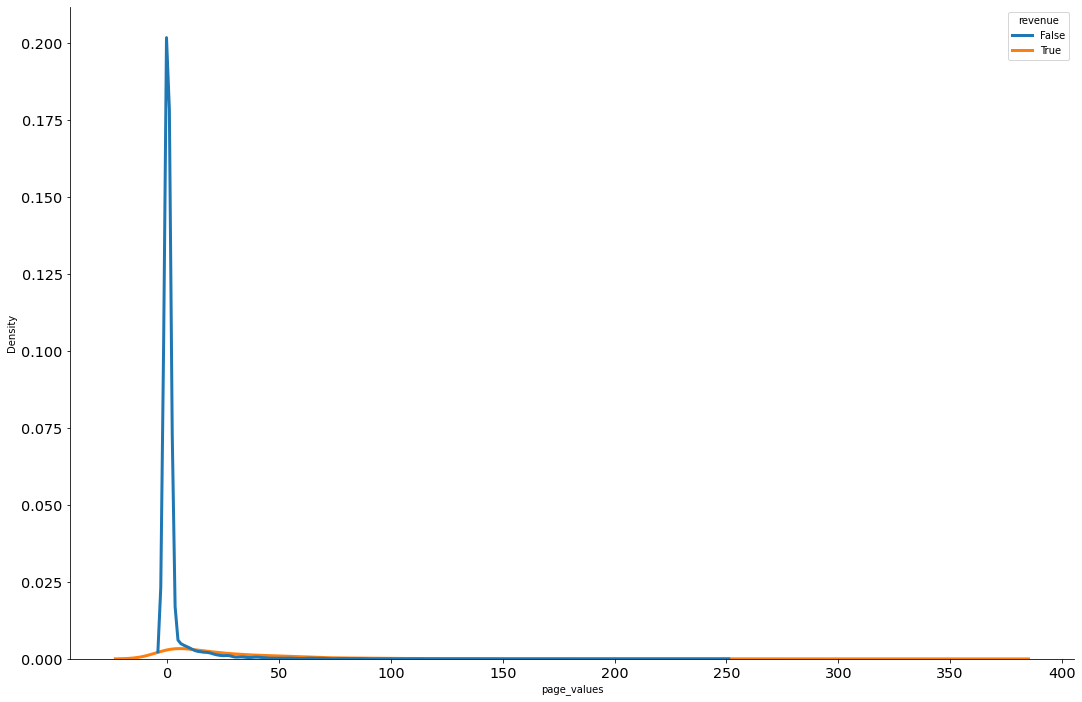

In [ ]:
sns.kdeplot(x='page_values', hue='revenue', data=df);

Apabila dilihat secara keseluruhan, nilai page value sangat skewed. Hampir seluruh nilainya sangat kecil yang apabila dilihat dari statistik deskriptif, hingga 75% data masi bernilai 0 yang berarti banyak sekali page yang tidak cukup ‘menarik’ bagi visitor.

**Rekomendasi**: Memperbaiki kualitas konten di website agar lebih menarik.
